In [1]:
#Perform imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.image import imread
import splitfolders
import cv2
import random
from PIL import Image
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras import applications

In [2]:
#access directory of images
data_dir='/Users/liatkatz/Downloads/flower_output'

In [3]:
os.listdir(data_dir)

['.DS_Store', 'train', 'val']

In [4]:
#make path to training set
train_path=data_dir+'/train'

In [5]:
#check training set
os.listdir(train_path)

['.DS_Store', 'daisy', 'rose', 'tulip', 'dandelion', 'sunflower']

In [6]:
#make path to testing set
test_path='/Users/liatkatz/Downloads/flower_output/val'

In [7]:
#access sample image
daisy_img='/Users/liatkatz/Downloads/flower_output/train/daisy/21652746_cc379e0eea_m.jpg'

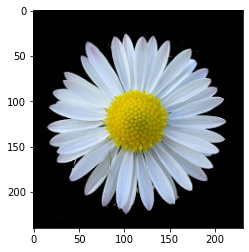

In [8]:
#display sample image
plt.imshow(imread(daisy_img))

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
#establish default image size for all photos
img_size=(100,100,3)

In [11]:
#determine image transformation parameters
image_gen=ImageDataGenerator(rescale=1./255,
                            horizontal_flip=True,
                            #vertical_flip=True,
                            shear_range=0.15,
                            zoom_range=0.15,
                            height_shift_range=0.15,
                            width_shift_range=0.15,
                            rotation_range=60,
                            fill_mode='nearest')

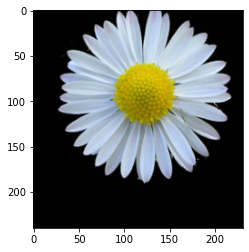

In [12]:
#perform image transformation on a sample image
plt.imshow(image_gen.random_transform(imread(daisy_img)))

In [13]:
#determine batch size
batch_size=16

In [14]:
#perform image transformation on training dataset
train_generator=image_gen.flow_from_directory(directory=train_path,
                                             target_size=img_size[:2],
                                              batch_size=batch_size,
                                             class_mode='categorical')

Found 3452 images belonging to 5 classes.


In [15]:
#perform image transformation on testing dataset
test_image_gen=image_gen.flow_from_directory(directory=test_path,
                                            target_size=img_size[:2],
                                             batch_size=batch_size,
                                            class_mode='categorical',
                                            shuffle=False)

Found 865 images belonging to 5 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
#build a model
model=Sequential()

model.add(Conv2D(filters=32, input_shape=img_size, activation='relu', kernel_size=(5,5), padding='same'))
#model.add(Conv2D(filters=32, input_shape=img_size, activation='relu', kernel_size=(3,3), padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, input_shape=img_size, activation='relu', kernel_size=(3,3), padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, input_shape=img_size, activation='relu', kernel_size=(3,3), padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=96, input_shape=img_size, activation='relu', kernel_size=(3,3), padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
#display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 96)        5

In [19]:
#run the model
model.fit(train_generator, epochs=30, validation_data=test_image_gen)

Epoch 1/30
216/216 [==============================] - 48s 218ms/step - loss: 1.2956 - accuracy: 0.4232 - val_loss: 1.1248 - val_accuracy: 0.5445
Epoch 2/30
216/216 [==============================] - 50s 231ms/step - loss: 1.0829 - accuracy: 0.5579 - val_loss: 1.0045 - val_accuracy: 0.6162
Epoch 3/30
216/216 [==============================] - 49s 224ms/step - loss: 1.0091 - accuracy: 0.5982 - val_loss: 1.0114 - val_accuracy: 0.5838
Epoch 4/30
216/216 [==============================] - 53s 244ms/step - loss: 0.9607 - accuracy: 0.6098 - val_loss: 0.9121 - val_accuracy: 0.6474
Epoch 5/30
216/216 [==============================] - 50s 230ms/step - loss: 0.8960 - accuracy: 0.6503 - val_loss: 0.8744 - val_accuracy: 0.6763
Epoch 6/30
216/216 [==============================] - 53s 243ms/step - loss: 0.8512 - accuracy: 0.6709 - val_loss: 0.9305 - val_accuracy: 0.6358
Epoch 7/30
216/216 [==============================] - 50s 229ms/step - loss: 0.8430 - accuracy: 0.6587 - val_loss: 0.8032 - val_ac

In [23]:
#get accuracy information
accuracies=pd.DataFrame(model.history.history)

In [26]:
accuracies.head()

,loss,accuracy,val_loss,val_accuracy
0,1.295575,0.423233,1.124806,0.544509
1,1.082900,0.557937,1.004459,0.616185
2,1.009082,0.598204,1.011379,0.583815
3,0.960674,0.609791,0.912097,0.647399
4,0.895999,0.650348,0.874372,0.676301


<AxesSubplot:>

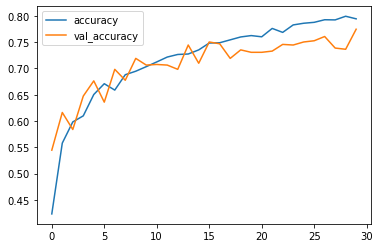

In [27]:
#plot accuracy
accuracies[['accuracy','val_accuracy']].plot()